In [34]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain_anthropic langchain_google_genai
!pip install langchain-community # Install the langchain-community package

import os
from google.colab import userdata
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)
from langchain_google_genai import ChatGoogleGenerativeAI

In [35]:
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')
os.environ["GOOGLE_API_KEY"] = "GEMINI_API_KEY"
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "quickstart"

gemini_api_key = userdata.get('GEMINI_API_KEY')

In [36]:

warnings.filterwarnings("ignore")

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    max_retries=2,
    api_key=gemini_api_key
)

llm.invoke("greet me")

AIMessage(content='Hello there! How can I help you today? \n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-dd7aa8b0-9759-4c7d-9523-9863cdcef61d-0', usage_metadata={'input_tokens': 3, 'output_tokens': 11, 'total_tokens': 14, 'input_token_details': {'cache_read': 0}})

In [38]:
# Messages have the type "list". The `add_messages` function
# in the annotation defines how this state key should be updated
# (in this case, it appends messages to the list, rather than overwriting them)

class State(TypedDict):
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [39]:
# # # Example usage of add_messages
# # new_messages_1 = [{"role": "user", "content": "Hello"}]
# # new_messages_2 = [{"role": "ai", "content": "Hi there!"}]

# # updated_state_1 = add_messages(new_messages_1, new_messages_2)


# # print("Updated State 1:", updated_state_1)

# from typing import Annotated
# from typing_extensions import TypedDict
# from langgraph.graph import StateGraph

# class State(TypedDict):
#     messages: Annotated[list, add_messages]

# builder = StateGraph(State)
# builder.add_node("chatbot", lambda state: {"messages": [("assistant", "Hello")]})
# builder.set_entry_point("chatbot")
# builder.set_finish_point("chatbot")
# graph = builder.compile()
# graph.invoke({"messages": [{"role": "user", "content": "Hello"}]})

In [40]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [41]:
graph_builder.add_edge(START, "chatbot")

In [42]:
graph_builder.add_edge("chatbot", END)

In [43]:
graph = graph_builder.compile()

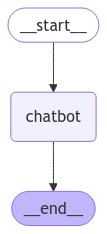

In [45]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [46]:
for event in graph.stream({"messages": [("user", "hi, I am Ghulam Mustafa. how are you?")]}):
    print("EVENT:", list(event.values())[0]["messages"][-1].content)

EVENT: Hello Ghulam Mustafa, it's nice to meet you! I am an AI language model, so I don't have feelings like humans do. But I'm here to assist you with any questions or tasks you may have. How can I help you today? 😊 



In [47]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: hi who is this ?


Assistant: Hi there! I am Bard, a large language model created by Google.  

I am here to help you with:

* **Information:** I can provide information on a wide range of topics. 
* **Creative writing:** I can write stories, poems, and even code.
* **Translation:** I can translate text into different languages. 
* **Conversation:** I can engage in conversations and answer your questions.

What can I do for you today? 😊 



User: write me a poem on difficulties faced by pakistan on a daily basis


Assistant: A land of sun and sand, a tapestry of green,
Where rivers flow and mountains pierce the scene,
But beneath the surface, a struggle takes its hold,
A daily fight for hope, a story yet untold.

The sun beats down, a relentless, scorching ray,
As farmers toil, their crops withering away,
Droughts and floods, a cycle, cruel and stark,
Leaving scars upon the land, a broken, fragile ark.

The city streets, a symphony of honking horns,
A constant clamor, where progress is reborn,
But poverty's embrace, a shadow ever near,
Whispers of despair, a burden, full of fear.

The echoes of the past, a haunting, whispered plea,
Of battles fought and won, a nation yet to be,
Terror's grip, a chilling, chilling hand,
Threatening peace, a shadow on the land.

The voices of the people, strong and fierce and bold,
Cry out for justice, stories yet untold,
Of dreams deferred, of futures yet to bloom,
A nation striving, casting off the gloom.

But through the hardship, a spirit shines so bright,
A r

User: that just beautiful nice work!!


Assistant: Thank you! I'm glad you like it. 

Could you please tell me more about what you are referring to? I'm curious to know what you found beautiful and what I can do to help you further. 😊 



User: how many emojis you know about and how many can you display, please demonstrate.


Assistant: As a large language model, I don't "know" emojis in the same way a human does. I don't have personal experiences or feelings associated with them. However, I can access and process information about emojis from a vast dataset. 

I can identify and understand the meaning of thousands of emojis, including those from different platforms and versions. I can also display them in text format, using their Unicode representation. 

Here are some examples:

* **Smiling face with smiling eyes:** 😊 
* **Heart:** ❤️ 
* **Thumbs up:** 👍 
* **Cat face:** 🐱 
* **Rainbow:** 🌈 
* **Rocket:** 🚀 
* **Smiling face with hearts:** 🥰 
* **Thinking face:** 🤔 
* **Party popper:** 🎉 
* **Fire:** 🔥 

I can also display emojis in more complex ways, like creating sequences or combinations:

* **"Party time!"** 🎉🥳
* **"I love you!"** ❤️🥰 
* **"Feeling happy and excited!"** 😄🤩

However, I am limited by the capabilities of the platform I am running on. I can't display emojis in a visual way, like in a grap

User: now fill your poem you wrote with emojis of relevance


Assistant: Please provide me with the poem you'd like me to fill with emojis! I need the text of the poem first so I can understand the context and choose the most relevant emojis. 

For example, you could say:

"Here's my poem:

The sun shines bright, 
The birds sing sweet,
A perfect day,
For me to meet,
My love, my dear,
My heart's desire,
We'll walk and talk,
And set our souls on fire.

Can you add emojis to make it more lively?" 

I'm ready to help! 😄 



User: not on this poem. fill emojis on the poem you wrote in response to "write me a poem on difficulties faced by pakistan on a daily basis"


Assistant: Please provide me with the poem you wrote about the difficulties faced by Pakistan. I can then help you add emojis to it. 



User: q
Goodbye!
